In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_colwidth", 280)

# Problem Set 1 - Text Mining: models and algorithms - DSMD 21-22


- Alejandra Vicaria
- Andrés Felipe Virgüez
- Niamh Eleanor Sheehan
- Kalliope Stassinos

## Part 1

#### Exercise 1: 
#### I want to obtain tweets containing a particular list of hashtags related to the Black Lives Matter movement for the period spanning May 25 2020 till the end of the year. Furthermore, I want all the tweets to be in English and exclude retweets. What is wrong with the following request?

- Include --archive , lang:en and  -is:retweet
- Correct the date format to "YEAR-MONTH-DAY"

In [68]:
# Correct query
!twarc2 search --archive "(#georgefloyd OR #justiceforgeorgefloyd OR #ICantBreathe OR #icantbreathe OR #blm OR #BLM OR #BlackLivesMatter OR #blacklivesmatter) lang:en -is:retweet" --start-time "2020-05-25" --end-time "2020-12-31" --limit 100 > files/HASHTAGS.jsonl


#### Exercise 2: 
#### Can you build a query to know the amount of tweets that will be produced in advance?

The total count:

In [69]:
!twarc2 counts --archive --start-time "2020-05-25" --end-time "2020-12-31" --csv "(#georgefloyd OR #justiceforgeorgefloyd OR #ICantBreathe OR #icantbreathe OR #blm OR #BLM OR #BlackLivesMatter OR #blacklivesmatter)" files/tot_counts_ex2.csv



  0%|          | Processed a moment/7 months [00:00<?, 0 tweets total ]
 14%|#4        | Processed a month/7 months [00:01<00:09, 0 tweets total ]
 28%|##8       | Processed 2 months/7 months [00:02<00:07, 632909 tweets total ]
 42%|####2     | Processed 3 months/7 months [00:04<00:05, 1465057 tweets total ]
 56%|#####6    | Processed 4 months/7 months [00:05<00:04, 2848426 tweets total ]
 70%|#######   | Processed 5 months/7 months [00:06<00:02, 5236878 tweets total ]
 85%|########4 | Processed 6 months/7 months [00:08<00:01, 8693433 tweets total ]
 99%|#########8| Processed 7 months/7 months [00:11<00:00, 13656450 tweets total ]
100%|##########| Processed 7 months/7 months [00:12<00:00, 65335942 tweets total ]
100%|##########| Processed 7 months/7 months [00:12<00:00, 65335942 tweets total ]


In [70]:
# Read the csv file generated by twarc to count the final number of possible tweets
df_2 = pd.read_csv("files/tot_counts_ex2.csv")
print('Total count :',df_2['hour_count'].sum())

Total count : 65335942


Similarly, by day:

In [71]:
!twarc2 counts --archive --csv --granularity day "(#georgefloyd OR #justiceforgeorgefloyd OR #ICantBreathe OR #icantbreathe OR #blm OR #BLM OR #BlackLivesMatter OR #blacklivesmatter) lang:en -is:retweet" --start-time "2020-05-25" --end-time "2020-12-31" files/counts_ex2.csv



  0%|          | Processed a moment/7 months [00:00<?, 0 tweets total ]
 14%|#4        | Processed a month/7 months [00:02<00:12, 0 tweets total ]
 28%|##8       | Processed 2 months/7 months [00:04<00:10, 157783 tweets total ]
 42%|####2     | Processed 3 months/7 months [00:07<00:10, 367304 tweets total ]
 56%|#####6    | Processed 4 months/7 months [00:10<00:08, 648592 tweets total ]
 70%|#######   | Processed 5 months/7 months [00:13<00:06, 1152809 tweets total ]
 85%|########4 | Processed 6 months/7 months [00:17<00:03, 1796114 tweets total ]
 97%|#########6| Processed 6 months/7 months [00:21<00:00, 2605265 tweets total ]
100%|##########| Processed 7 months/7 months [00:23<00:00, 8515736 tweets total ]
100%|##########| Processed 7 months/7 months [00:23<00:00, 8515736 tweets total ]


In [72]:
# Read the csv file generated by twarc to count the final number of possible tweets
df_2 = pd.read_csv("files/counts_ex2.csv")
print(df_2['day_count'].sum())

8515736


More than 8.5 million of tweets per day

<AxesSubplot:xlabel='start', ylabel='day_count'>

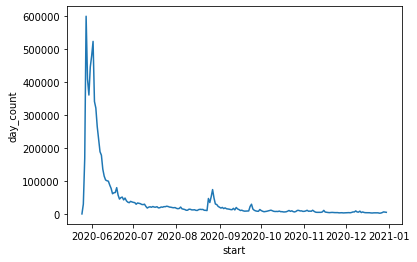

In [73]:
df_2['start'] = pd.to_datetime(df_2['start'])
sns.lineplot(x = df_2['start'], y = df_2['day_count'])

#### Exercise 3:

#### Suppose I want to track the activity around Miami beach for the March 29–31, 2019. Is the following query correct?  HINT: You can use this to check out coordinates.

- Adjust coodinates and exchange long and lat. Exact coordinates of Miami here https://www.latlong.net/place/miami-beach-fl-usa-32070.html
- include --archive

In [74]:
# Counts
!twarc2 counts --archive --csv --start-time "2019-03-29" --end-time "2019-03-31" "point_radius:[-80.139198 25.793449 3.11mi] -is:retweet" > files/miami_counts.csv

df_3 = pd.read_csv("files/miami_counts.csv")
print(df_3['hour_count'].sum())

8776


In [75]:
# Query
!twarc2 search --archive --start-time "2019-03-29" --end-time "2019-03-31" "point_radius:[-80.139198 25.793449 3.11mi]"  > files/miami.json


#### Exercise 4: 
#### Can you figure out an alternative way to do it without point radius? If so, do both queries produce the same number of tweets (I want you to give me this without running them). If you manage to correct the first one, run it and store the json file (only if your previous search indicates that there will be less than 80.000 tweets). We will use this output in the second problem set.

One nice option is to use the option of places from twarc2, to delimitate the search withing Miami Beach

In [76]:
!twarc2 places Miami

Miami, FL, United States [id=04cb31bae3b3af93]
Miami Beach, FL, United States [id=0121b92345f0e2b4]
North Miami, FL, United States [id=cae987165260f81f]
Miami Shores, FL, United States [id=77ad88ac9caf6874]
West Miami, FL, United States [id=c53fe057eaa0a64d]
South Miami, FL, United States [id=28edff73b28c1a74]
Miamisburg, OH, United States [id=6252d06c3e5bb9f9]
North Miami Beach, FL, United States [id=045badf8fedd9c63]
Miami Lakes, FL, United States [id=d286131d0c030d06]
South Miami Heights, FL, United States [id=576bb66a5b95f65a]
Miami, OK, United States [id=135ecfb4c48e2fb7]
Miami Springs, FL, United States [id=a832efe6c7c00859]
Miami Heights, OH, United States [id=01fc64883cc9eb37]
Miami, AZ, United States [id=16c294642f4b0a6c]
New Miami, OH, United States [id=8ca8e2585252e3da]
North Miami, OK, United States [id=329bf7ba597814cc]
Miami, Carmen, Mexico [id=6a49987e4b5da1f1]
Miamiville, OH, United States [id=000b39b7250ab6d9]
Miami, Gold Coast, Australia [id=4825d7cc07f85ade]
Parque M

In [77]:
!twarc2 counts --archive --csv --start-time "2019-03-29" --end-time "2019-03-31" "(place:0121b92345f0e2b4)" files/miami_counts_ex4.csv
df = pd.read_csv("files/miami_counts_ex4.csv")
print(df['hour_count'].sum())

2517



  0%|          | Processed a moment/2 days [00:00<?, 0 tweets total ]
100%|##########| Processed 2 days/2 days [00:01<00:00, 0 tweets total ]
100%|##########| Processed 2 days/2 days [00:01<00:00, 2517 tweets total ]


2512 tweets using the place id for Miami Beach, FL, United States

#### Exercise 5:
#### Use the command line (calling twarc) to transform miami.json to csv. Make sure you merge retweets and exclude duplicates.

There are two ways to do this. We can run the following from the command line:

In [83]:
!twarc2 csv --merge-retweets files/miami.json files/miami.csv 
#by default duplicates are excluded


  0%|          | Processed 0.00/22.3M of input file [00:00<?, ?B/s]
  4%|3         | Processed 798k/22.3M of input file [00:00<00:03, 6.58MB/s]
  6%|5         | Processed 1.30M/22.3M of input file [00:00<00:03, 5.91MB/s]
  8%|8         | Processed 1.83M/22.3M of input file [00:00<00:03, 5.65MB/s]
 12%|#1        | Processed 2.58M/22.3M of input file [00:00<00:03, 6.36MB/s]
 16%|#6        | Processed 3.60M/22.3M of input file [00:00<00:02, 7.08MB/s]
 21%|##        | Processed 4.67M/22.3M of input file [00:00<00:02, 8.03MB/s]
 25%|##4       | Processed 5.47M/22.3M of input file [00:00<00:02, 7.59MB/s]
 30%|##9       | Processed 6.58M/22.3M of input file [00:00<00:01, 8.59MB/s]
 33%|###3      | Processed 7.38M/22.3M of input file [00:01<00:01, 8.32MB/s]
 37%|###7      | Processed 8.28M/22.3M of input file [00:01<00:01, 8.38MB/s]
 41%|####1     | Processed 9.22M/22.3M of input file [00:01<00:01, 8.63MB/s]
 44%|####3     | Processed 9.77M/22.3M of input file [00:01<00:01, 7.57MB/s]
 48%|###

#### Exercise 6:

#### Run the following query: 
    
```
    twarc2 search --archive --limit 1000 "from:realDonaldTrump" >trump.json
    
```
    
#### Take a look at the output. What is wrong?

In [85]:
!twarc2 search --archive --limit 1000 "from:realDonaldTrump" > files/trump.json

The json file is empty because the query did not retrieve any data. The reason is that realDonaldTrump is a suspended account

#### Exercise 7:

#### Build a query to obtain tweets that contain the sentence Barcelona School of Economics excluding retweets. I want the query to obtain exactly that sentence and not a possible combination of them. HINT: Look for ways to escape quotations in the terminal (they are different in mac and windows).

In [86]:
!twarc2 search --archive "(\"Barcelona School of Economics\") lang:en -is:retweet" --limit 1000 > files/BSE.json
!twarc2 csv files/BSE.json files/BSE.csv


  0%|          | Processed 0.00/164k of input file [00:00<?, ?B/s]
100%|##########| Processed 164k/164k of input file [00:00<00:00, 3.01MB/s]

\u2139\ufe0f
Parsed 64 tweets objects from 1 lines in the input file.
Wrote 64 rows and output 74 columns in the CSV.



## Part 2

- Country Ireland
- Last presidential election took place 8th February 2020

In [250]:
# Since politicsie_names.txt has only the names we will create a new file (from_p_usernames) to add "from:"" in each line before the username

usernames = pd.read_csv("files/politicsie_names.txt", names=['username'])
usernames['username'] = usernames['username'].str.replace(r'\t', '')
usernames['username'] = 'from:' + usernames['username']

print(usernames.shape)
usernames.to_csv('from_p_usernames.txt', index=False, header = False)

(202, 1)


<ipython-input-250-6e0402ea5bb1>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  usernames['username'] = usernames['username'].str.replace(r'\t', '')


A list of 202 politicians

In [249]:
# Counts of the total tweets to download in elections year
!twarc2 searches --archive --start-time "2020-02-01" --end-time "2020-02-15" --counts-only --combine-queries files/from_p_usernames.txt files/politicians_counts1.csv
df_21 = pd.read_csv("files/politicians_counts1.csv")
df_21['day_count'].sum()

100%|███████████| Processed 202/202 lines of input file [00:06<00:00, 30.44it/s]


8690

In [234]:
# Download the 8690 tweets of the 201 politicians
!twarc2 searches --archive --start-time "2020-02-01" --end-time "2020-02-15" --combine-queries files/from_p_usernames.txt files/politicians1.json
!twarc2 csv files/politicians1.json files/politicians1.csv


100%|███████████| Processed 202/202 lines of input file [03:47<00:00,  1.13s/it]
100%|██████████████| Processed 23.8M/23.8M of input file [00:07<00:00, 3.26MB/s]

ℹ️
Parsed 8464 tweets objects from 91 lines in the input file.
Wrote 8464 rows and output 74 columns in the CSV.



In [235]:
# Counts of the total tweets to download one year before
!twarc2 searches --archive --start-time "2019-02-01" --end-time "2019-02-15" --counts-only --combine-queries files/from_p_usernames.txt files/politicians_counts2.csv
df_22 = pd.read_csv("files/politicians_counts2.csv")
df_22['day_count'].sum()


100%|███████████| Processed 202/202 lines of input file [00:06<00:00, 31.18it/s]


5593

In [236]:
!twarc2 searches --archive --start-time "2019-02-01" --end-time "2019-02-15" --combine-queries files/from_p_usernames.txt files/politicians2.json
!twarc2 csv files/politicians2.json files/politicians2.csv


100%|███████████| Processed 202/202 lines of input file [02:27<00:00,  1.37it/s]
100%|██████████████| Processed 15.7M/15.7M of input file [00:04<00:00, 3.33MB/s]

ℹ️
Parsed 5542 tweets objects from 58 lines in the input file.
Wrote 5542 rows and output 74 columns in the CSV.



In [238]:
# Number of tweets per politician in 2020
df = pd.read_csv("files/politicians1.csv")
print(df['author.username'].value_counts())

CathMurphyTD       459
paulmurphy_TD      274
nealerichmond      258
GaryGannonTD       237
josephamadigan     207
                  ... 
joefla               2
ryan_patricia        2
SeanFlemingTD        1
MichaelFitzmau1      1
RichardODonoghu      1
Name: author.username, Length: 147, dtype: int64


We have data from 147 politicians

In [251]:
# Checking a bit the data
usernames = pd.read_csv("files/from_p_usernames.txt", names=['username'])
usernames['username'] = usernames['username'].str.replace(r'from:', '')
print(usernames)

# We Don't have data downloaded of the following usernames
print(len([i for i in usernames['username'].values if i not in df['author.username'].unique()]))
print([i for i in usernames['username'].values if i not in df['author.username'].unique()])

            username
0        1hildegarde
1        alanfarrell
2    alankellylabour
3       anneferristd
4         annphelan1
..               ...
197       eoinobroin
198     marckc_green
199   sofearghail_td
200      donnchadhol
201         romurchu

[202 rows x 1 columns]
33
['anneferristd', 'annphelan1', 'aosnodaigh', 'brianwalshfg', 'corcorankennedy', 'dannevilletd', 'finianmcgrath', 'joan_burton', 'marcmacsharry', 'michaelcolreavy', 'patburtonfg', 'patdeeringfg', 'paulmurphy_TD', 'rebeccamoy', 'ruairiquinntd', 'browne4dail', 'conwaywalsh', 'readacronin', 'normafoleytd1', 'clairekerrane', 'stevengreen1', 'mimcnamaratd', 'veronamurphyind', 'johnnymythensf', 'cnolanoffaly', 'cosullivantd', 'padraigosull', 'brianstanleysf', 'paulinetullytd', 'wardy1916', 'wynnetd', 'eoinobroin', 'sofearghail_td']
